In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
from pathlib import Path
from IPython.display import Audio, display
import matplotlib.pyplot as plt
import librosa.display
import torch
import torchaudio
import numpy as np

In [4]:
data_path = Path('../data/ESC-50/audio')
vacuum_cleaner_file_name = '1-100210-A-36.wav'
pouring_water_file_name = '1-118559-A-17.wav'

vacuum_cleaner_file_path = Path(data_path/vacuum_cleaner_file_name)
pouring_water_file_path =  Path(data_path/pouring_water_file_name)

In [17]:
import scipy.io as sio
import scipy.io.wavfile
#samplerate, signal = sio.wavfile.read(vacuum_cleaner_file_path)
samplerate, signal = sio.wavfile.read(pouring_water_file_path)

In [6]:
print(samplerate)
print(signal)

44100
[ -228  -410  -369 ...  7054  -287 -9471]


In [18]:
import requests, json
URL = 'http://172.17.0.7:8893/invocations'
audio_json = {}
audio_json['sample_rate'] = samplerate
audio_json['signal'] = signal.tolist()
input_data_json = {}
input_data_json['input'] = audio_json
#input_data_json

In [29]:
import threading, time
class InferenceThread(threading.Thread):
    def __init__(self, stop, url, input_json):
        threading.Thread.__init__(self)
        self.stop = stop
        self.url = url
        self.input_json = input_json
        
    def run(self):
        while True:
            res = requests.post(self.url, json=self.input_json)
            print('status code = ', res.status_code)
            print('predict result = ', res.json()['predict_result'])
            plt.imshow(res.json()['spec_image'])
            time.sleep(0.5)
            if self.stop():
                print('exit while loop ~')
                break;
        print('thread stop ~')

In [30]:
thread_stop = False
inferenceThread = InferenceThread(lambda: thread_stop, URL, input_data_json)
inferenceThread.start()

status code =  200
predict result =  {'index': 35, 'label': 'pouring_water', 'probability': 0.971555233001709}
status code =  200
predict result =  {'index': 35, 'label': 'pouring_water', 'probability': 0.971555233001709}
status code =  200
predict result =  {'index': 35, 'label': 'pouring_water', 'probability': 0.971555233001709}
status code =  200
predict result =  {'index': 35, 'label': 'pouring_water', 'probability': 0.971555233001709}
status code =  200
predict result =  {'index': 35, 'label': 'pouring_water', 'probability': 0.971555233001709}
status code =  200
predict result =  {'index': 35, 'label': 'pouring_water', 'probability': 0.971555233001709}
status code =  200
predict result =  {'index': 35, 'label': 'pouring_water', 'probability': 0.971555233001709}
status code =  200
predict result =  {'index': 35, 'label': 'pouring_water', 'probability': 0.971555233001709}
status code =  200
predict result =  {'index': 35, 'label': 'pouring_water', 'probability': 0.971555233001709}
s

exit while loop ~
thread stop ~


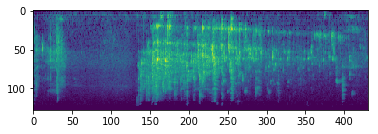

In [31]:
thread_stop = True